In [13]:
import pandas as pd
import os

### TASK 1: Merge the sales data of 12 months into a single CSV file 

In [18]:
files=[file for file in os.listdir('./Sales_Data copy')]

all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv("./Sales_Data copy/"+file)
    all_months_data=pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv",index=False)


## Read in updated DataFrame  

In [19]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## CLEAN THE DATA

1. Drop rows with NaN values 

In [22]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
all_data=all_data.dropna(how='all')

## Augment Data with aditional columns for better analysis 

### 1. Adding month column. 

all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

In [ ]:
#Finding 'or' and deleting it  

In [26]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']


In [ ]:
#Converting columns to the correct type

In [28]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### 2. add a sales column (quantity ordered* price each)

In [30]:
all_data['Sales']=all_data['Quantity Ordered']* all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### 3. Adding a 'Cities' column.

In [40]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]



all_data['city']=all_data['Purchase Address'].apply(lambda x:get_city(x)+'('+get_state(x)+')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City(NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City(NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City(NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco(CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta(GA)


# what was the best month for sales ? How much was earned every month? 

In [45]:
results=all_data.groupby(['Month']).sum()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,city
Month,,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73,Dallas(TX)New York City(NY)New York City(NY)Sa...
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42,Portland(ME)San Francisco(CA)New York City(NY)...
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38,San Francisco(CA)Portland(OR)San Francisco(CA)...
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24,Dallas(TX)Boston(MA)Los Angeles(CA)Los Angeles...
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75,Portland(OR)San Francisco(CA)Boston(MA)Boston(...
6,1957481958691960721961321966381966391976981990...,27in FHD MonitorAAA Batteries (4-pack)Lightnin...,15253,2562025.61,06/01/19 03:2606/01/19 01:0606/01/19 00:1806/0...,"856 Elm St, San Francisco, CA 94016877 Center ...",2577802.26,San Francisco(CA)Dallas(TX)San Francisco(CA)Sa...
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76,Atlanta(GA)Seattle(WA)Atlanta(GA)Atlanta(GA)Se...
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88,Seattle(WA)Dallas(TX)Portland(OR)Los Angeles(C...
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13,San Francisco(CA)San Francisco(CA)Seattle(WA)S...


In [37]:
import matplotlib.pyplot as plt


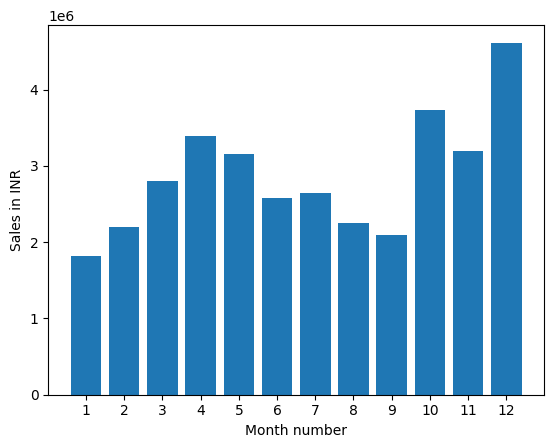

In [46]:
results=all_data.groupby(['Month']).sum()
months=range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in INR')
plt.xlabel('Month number')
plt.show()

# which city has the highest number of sales

In [50]:
results=all_data.groupby(['city']).sum()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
city,,,,,,,,
Atlanta(GA),2956692956932957102957372957372957562957602957...,USB-C Charging CableWired HeadphonesAAA Batter...,16602,2779908.20,12/18/19 12:3812/16/19 16:4012/26/19 19:0912/1...,"43 Hill St, Atlanta, GA 30301856 12th St, Atla...",104794,2795498.58
Austin(TX),2956802957022957032957032957542957892957982958...,Lightning Charging CableWired HeadphonesAA Bat...,11153,1809873.61,12/01/19 14:3012/21/19 18:5012/17/19 12:2712/1...,"338 Main St, Austin, TX 73301628 River St, Aus...",69829,1819581.75
Boston(MA),2956772956812956812956812956812956872956952957...,AA Batteries (4-pack)Google PhoneUSB-C Chargin...,22528,3637409.77,12/20/19 19:1912/25/19 12:3712/25/19 12:3712/2...,"866 Pine St, Boston, MA 0221579 Elm St, Boston...",141112,3661642.01
Dallas(TX),2956722956732956742956782956792956942957242957...,USB-C Charging CableBose SoundSport Headphones...,16730,2752627.82,12/13/19 09:2912/15/19 23:2612/28/19 11:5112/0...,"813 Hickory St, Dallas, TX 75001718 Wilson St,...",104620,2767975.40
Los Angeles(CA),2956762956882956912956922957062957142957162957...,ThinkPad LaptopApple Airpods HeadphonesBose So...,33289,5421435.23,12/28/19 17:1912/08/19 11:2112/22/19 18:3412/1...,"410 Lincoln St, Los Angeles, CA 90001546 Park ...",208325,5452570.80
New York City(NY),2956652956662956672956702956982956982957002957...,Macbook Pro LaptopLG Washing MachineUSB-C Char...,27932,4635370.83,12/30/19 00:0112/29/19 07:0312/12/19 18:2112/3...,"136 Church St, New York City, NY 10001562 2nd ...",175741,4664317.43
Portland(ME),2956862957972958622960182961272961582962062962...,USB-C Charging CableWired HeadphonesAAA Batter...,2750,447189.25,12/17/19 16:1012/16/19 09:2312/03/19 14:2212/2...,"573 Maple St, Portland, ME 04101163 Washington...",17144,449758.27
Portland(OR),2956712956822957342957572958192958572958922958...,USB-C Charging CableUSB-C Charging CableAAA Ba...,11303,1860558.22,12/16/19 15:1012/23/19 19:2512/25/19 12:3812/0...,"928 12th St, Portland, OR 97035780 Elm St, Por...",70621,1870732.34
San Francisco(CA),2956682956752956832956842956852956892956962956...,27in FHD MonitorUSB-C Charging CableWired Head...,50239,8211461.74,12/22/19 15:1312/13/19 13:5212/23/19 22:4612/0...,"410 6th St, San Francisco, CA 94016594 1st St,...",315520,8262203.91


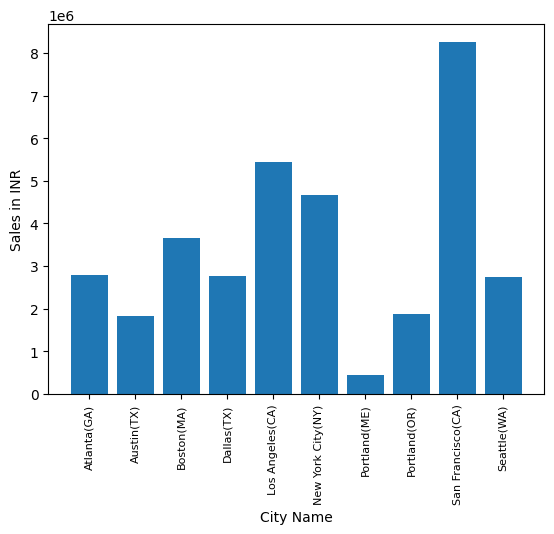

In [52]:
cities=[city for city ,df in all_data.groupby('city')]


plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('Sales in INR')
plt.xlabel('City Name')
plt.show()

# what time should we display advertisements to maximize the likelihood of customer's buying product ? 

In [53]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City(NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City(NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City(NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco(CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta(GA)


In [55]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')


In [59]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute

In [60]:
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City(NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City(NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City(NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco(CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta(GA),12,38


In [67]:
import numpy as np

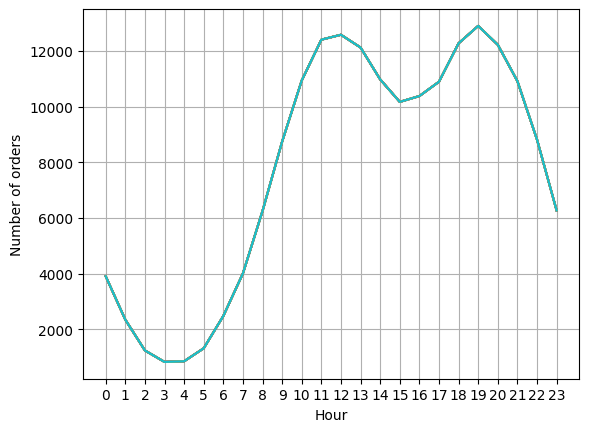

In [69]:


hours = [hour for hour, df in all_data.groupby(['Hour'])]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(np.array(hours).flatten())  # Flatten the list
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()


#### my recommendation is to advertise just before 11am (11) or 7pm (19)

# what products are often sold together?

In [70]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston(MA),12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston(MA),12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston(MA),12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston(MA),12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City(NY),14,32
37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,23.90,New York City(NY),14,32
42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin(TX),12,27
43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin(TX),12,27
66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston(MA),14,49
67,295726,Lightning Charging Cable,1,14.95,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,14.95,Boston(MA),14,49


In [71]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()

/var/folders/65/16j1frxx53x29svk26jwryjh0000gn/T/ipykernel_7003/1236079476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [72]:
df.head(10)

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
80,295737,"iPhone,Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor,Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones,Wired Headphones"
129,295783,"Vareebadd Phone,USB-C Charging Cable"
133,295786,"USB-C Charging Cable,Apple Airpods Headphones"


In [73]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# which product is sold the most and why do u think it is sold the most ?

In [74]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City(NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City(NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City(NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco(CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta(GA),12,38


In [79]:
product_group = all_data.groupby('Product')
all_data.drop('Order Date', axis=1, inplace=True)

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,city,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,1700.00,New York City(NY),0,1
1,295666,LG Washing Machine,1,600.00,"562 2nd St, New York City, NY 10001",12,600.00,New York City(NY),7,3
2,295667,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",12,11.95,New York City(NY),18,21
3,295668,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco(CA),15,13
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta(GA),12,38


In [85]:
product_group.sum()



,Order ID,Quantity Ordered,Price Each,Purchase Address,Month,Sales,city,Hour,Minute
Product,,,,,,,,,
20in Monitor,2957162958072958172958552959012959082959462959...,4129,451068.99,"593 9th St, Los Angeles, CA 90001286 Lincoln S...",29336,454148.71,Los Angeles(CA)Los Angeles(CA)Austin(TX)Boston...,58764,122252
27in 4K Gaming Monitor,2957942958312958402958642958832958912959202959...,6244,2429637.70,"796 Chestnut St, Boston, MA 02215335 Chestnut ...",44440,2435097.56,Boston(MA)Dallas(TX)Los Angeles(CA)Austin(TX)N...,90916,184331
27in FHD Monitor,2956682957082957192957282957332957462957632958...,7550,1125974.93,"410 6th St, San Francisco, CA 94016846 9th St,...",52558,1132424.50,San Francisco(CA)Boston(MA)Los Angeles(CA)New ...,107540,219948
34in Ultrawide Monitor,2957212957292957302957532957562957822958022958...,6199,2348718.19,"915 1st St, Seattle, WA 98101432 1st St, Dalla...",43304,2355558.01,Seattle(WA)Dallas(TX)San Francisco(CA)Dallas(T...,89076,183480
AA Batteries (4-pack),2956702956772956922956992957032957202957232957...,27635,79015.68,"200 Jefferson St, New York City, NY 10001866 P...",145558,106118.40,New York City(NY)Boston(MA)Los Angeles(CA)Seat...,298342,609039
AAA Batteries (4-pack),2956742956782956842957062957102957112957252957...,31017,61716.59,"77 7th St, Dallas, TX 75001187 Lincoln St, Dal...",146370,92740.83,Dallas(TX)Dallas(TX)San Francisco(CA)Los Angel...,297332,612113
Apple Airpods Headphones,2956872956882956902957322957352957412957422957...,15661,2332350.00,"531 Ridge St, Boston, MA 02215546 Park St, Los...",109477,2349150.00,Boston(MA)Los Angeles(CA)Seattle(WA)Boston(MA)...,223304,455570
Bose SoundSport Headphones,2956732956812956912957002957012957032957092957...,13457,1332366.75,"718 Wilson St, Dallas, TX 7500179 Elm St, Bost...",94113,1345565.43,Dallas(TX)Boston(MA)Los Angeles(CA)New York Ci...,192445,392603
Flatscreen TV,2957452958462958962959522959532959992960412960...,4819,1440000.00,"124 Lakeview St, New York City, NY 10001453 Jo...",34224,1445700.00,New York City(NY)Atlanta(GA)Los Angeles(CA)Sea...,68815,142789


In [86]:
quantity_ordered = product_group.sum()['Quantity Ordered']


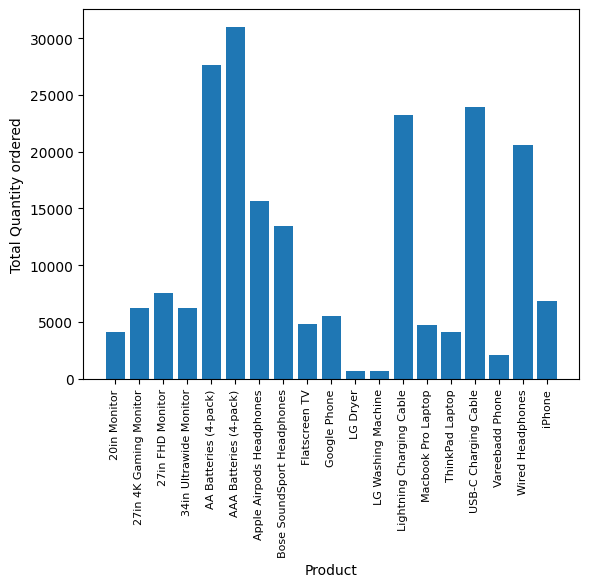

In [90]:
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.ylabel('Total Quantity ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

In [100]:

prices = all_data.groupby('Product').agg({'Price Each': 'mean'})
print(prices)



                            Price Each
Product                               
20in Monitor                    109.99
27in 4K Gaming Monitor          389.99
27in FHD Monitor                149.99
34in Ultrawide Monitor          379.99
AA Batteries (4-pack)             3.84
AAA Batteries (4-pack)            2.99
Apple Airpods Headphones        150.00
Bose SoundSport Headphones       99.99
Flatscreen TV                   300.00
Google Phone                    600.00
LG Dryer                        600.00
LG Washing Machine              600.00
Lightning Charging Cable         14.95
Macbook Pro Laptop             1700.00
ThinkPad Laptop                 999.99
USB-C Charging Cable             11.95
Vareebadd Phone                 400.00
Wired Headphones                 11.99
iPhone                          700.00


/var/folders/65/16j1frxx53x29svk26jwryjh0000gn/T/ipykernel_7003/3710149802.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
/var/folders/65/16j1frxx53x29svk26jwryjh0000gn/T/ipykernel_7003/3710149802.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


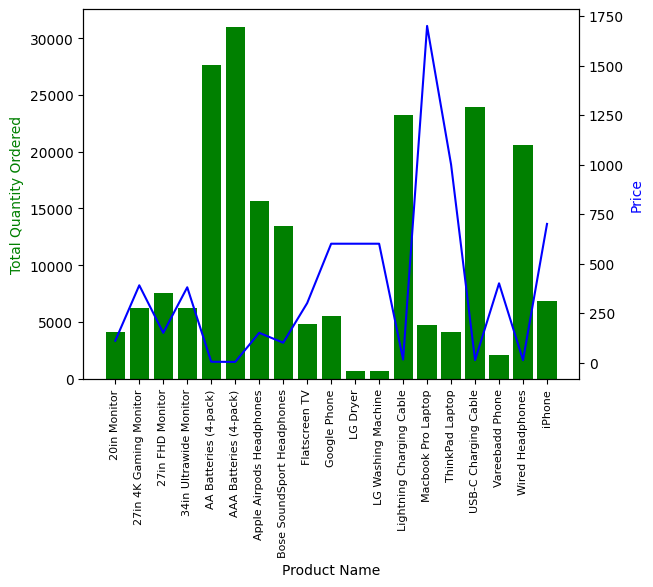

In [103]:

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Total Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()



when the quantity ordered is high, the price is low and vice versa. Therfore, the price of the product plays a major factor in its sales